# PROJECT TITLE-  "Electric Motor Temperature Prediction"

Business Objective:
Predict Motor Speed based on other attributes available

The dataset comprises several sensor data collected from a permanent magnet synchronous motor (PMSM) deployed on a test bench. The PMSM represents a ccTest bench measurements were collected by the LEA department at Paderborn University. This dataset is mildly anonymized.  
All recordings are sampled at 2 Hz. The dataset consists of multiple measurement sessions, which can be distinguished from each other by the column "profile_id". A measurement session can be between one and six hours long.
The motor is excited by hand-designed driving cycles denoting a reference motor speed and a reference torque. Currents in d/q-coordinates (columns "i_d" and i_q") and voltages in d/q-coordinates (columns "u_d" and "u_q") are a result of a standard control strategy trying to follow the reference speed and torque. Columns "motor_speed" and "torque" are the resulting quantities achieved by that strategy, derived from set currents and voltages.
Most driving cycles denote random walks in the speed-torque-plane in order to imitate real world driving cycles to a more accurate degree than constant excitations and ramp-ups and -downs would.


In [1]:
##importing necessary libraries for building the project

##basic libraries
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
%matplotlib inline

#import library for linear rigression model
import statsmodels.formula.api as smf


#import library for splitting the data into training and testing data
from sklearn.model_selection import train_test_split

#import library for Decision Tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

#import library for Random Forest model
from sklearn.ensemble import RandomForestRegressor

#import library for Ada boost Regressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

#import library for Gradient Boost regressor
from sklearn.ensemble import GradientBoostingRegressor

#import library for Bagging Regressor Model
from sklearn.ensemble import BaggingRegressor
from scipy.stats import uniform, randint


#import library for avoid warinings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("temperature_data.csv")

In [3]:
data.head()

ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0 -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182  1.029572   
1 -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133  1.029509   
2 -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431  1.029448   
3 -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636  1.032845   
4 -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701  1.031807   

        i_q        pm  stator_yoke  stator_tooth  stator_winding  profile_id  
0 -0.245860 -2.522071    -1.831422     -2.066143       -2.018033           4  
1 -0.245832 -2.522418    -1.830969     -2.064859       -2.017631           4  
2 -0.245818 -2.522673    -1.830400     -2.064073       -2.017343           4  
3 -0.246955 -2.521639    -1.830333     -2.063137       -2.017632           4  
4 -0.246610 -2.521900    -1.830498     -2.062795       -2.018145           4

Based on the information provided, it sounds like this is a regression problem. The goal of the project is to predict the motor speed based on other attributes available in the dataset. In a regression problem, the goal is to predict a continuous value (in this case, the motor speed) given a set of inputs (other attributes in the dataset).

# 2-Approch towards the Problem

The standard approach for this regression problem would be to use a machine learning model to make predictions about the motor speed based on the other attributes in the dataset. The process typically involves the following steps:

1-Data Exploration: This includes visualizing the data, identifying patterns, and understanding the relationships between the features and the target variable.

2-Data Preparation: This includes cleaning the data, dealing with missing values, and normalizing the features.

3-Model Selection: Selecting an appropriate model that can learn the relationship between the features and the target variable. Some popular models for regression problems include linear regression, decision trees, and random forests.

4-Model Training: Train the selected model on the prepared data.

5-Model Evaluation: Evaluating the model's performance on the training data. This is done using metrics such as mean squared error, mean absolute error, and R-squared.

6-Model Optimization: Optimizing the model by fine-tuning the parameters and feature selection.

7-Model Deployment: Once the model has been optimized, it can be deployed to make predictions on new, unseen data.

# 3-Data Exploration and EDA

In [4]:
data.tail()

ambient   coolant       u_d       u_q  motor_speed   torque  \
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.25564   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.25564   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.25564   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.25564   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.25564   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
998065  1.029142 -0.245723  0.429853     1.018568      0.836084   
998066  1.029148 -0.245736  0.429751     1.013416      0.834438   
998067  1.029191 -0.245701  0.429439     1.002906      0.833936   
998068  1.029147 -0.245727  0.429558     0.999157      0.830504   
998069  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  profile_id  
998065        0.494725          72  
998066        0.494279          72  
998067        0.492666          72  
998068        0.490581          72  
998069        0.489382          72

In [5]:
data.rename(columns={'ambient' : 'Ambient','coolant':'Coolant','u_d': 'Voltage_D_component','u_q':'Voltage_Q_component',
                     'motor_speed': 'Motor_Speed','torque':'Torque','i_d':'Current_D_component','i_q':'Current_Q_component',
                    'pm':'PMST','stator_yoke':'Stator_Yoke','stator_tooth':"Stator_Tooth",'stator_winding':'Stator_Winding',
                    "profile_id":"Profile_ID"},inplace=True)


In [6]:
data.columns

Index(['Ambient', 'Coolant', 'Voltage_D_component', 'Voltage_Q_component',
       'Motor_Speed', 'Torque', 'Current_D_component', 'Current_Q_component',
       'PMST', 'Stator_Yoke', 'Stator_Tooth', 'Stator_Winding', 'Profile_ID'],
      dtype='object')

# Modified the Data for splitting it

In [7]:
New_Data=data[['Motor_Speed','Ambient', 'Coolant', 'Voltage_D_component', 'Voltage_Q_component',
               'Torque', 'Current_D_component', 'Current_Q_component','PMST', 'Stator_Yoke',
               'Stator_Tooth', 'Stator_Winding', 'Profile_ID']]

In [8]:
New_Data

Motor_Speed   Ambient   Coolant  Voltage_D_component  \
0         -1.222428 -0.752143 -1.118446             0.327935   
1         -1.222429 -0.771263 -1.117021             0.329665   
2         -1.222428 -0.782892 -1.116681             0.332771   
3         -1.222430 -0.780935 -1.116764             0.333700   
4         -1.222429 -0.774043 -1.116775             0.335206   
...             ...       ...       ...                  ...   
998065    -1.222428 -0.047497  0.341638             0.331475   
998066    -1.222437 -0.048839  0.320022             0.331701   
998067    -1.222430 -0.042350  0.307415             0.330946   
998068    -1.222432 -0.039433  0.302082             0.330987   
998069    -1.222431 -0.043803  0.312666             0.330830   

        Voltage_Q_component    Torque  Current_D_component  \
0                 -1.297858 -0.250182             1.029572   
1                 -1.297686 -0.249133             1.029509   
2                 -1.301822 -0.249431             1.029448   
3                 -1.301852 -0.248636             1.032845   
4                 -1.303118 -0.248701             1.031807   
...                     ...       ...                  ...   
998065            -1.246114 -0.255640             1.029142   
998066            -1.250655 -0.255640             1.029148   
998067            -1.246852 -0.255640             1.029191   
998068            -1.249505 -0.255640             1.029147   
998069            -1.246590 -0.255640             1.029141   

        Current_Q_component      PMST  Stator_Yoke  Stator_Tooth  \
0                 -0.245860 -2.522071    -1.831422     -2.066143   
1                 -0.245832 -2.522418    -1.830969     -2.064859   
2                 -0.245818 -2.522673    -1.830400     -2.064073   
3                 -0.246955 -2.521639    -1.830333     -2.063137   
4                 -0.246610 -2.521900    -1.830498     -2.062795   
...                     ...       ...          ...           ...   
998065            -0.245723  0.429853     1.018568      0.836084   
998066            -0.245736  0.429751     1.013416      0.834438   
998067            -0.245701  0.429439     1.002906      0.833936   
998068            -0.245727  0.429558     0.999157      0.830504   
998069            -0.245722  0.429166     0.987163      0.828046   

        Stator_Winding  Profile_ID  
0            -2.018033           4  
1            -2.017631           4  
2            -2.017343           4  
3            -2.017632           4  
4            -2.018145           4  
...                ...         ...  
998065        0.494725          72  
998066        0.494279          72  
998067        0.492666          72  
998068        0.490581          72  
998069        0.489382          72  

[998070 rows x 13 columns]

In [9]:
New_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Motor_Speed          998070 non-null  float64
 1   Ambient              998070 non-null  float64
 2   Coolant              998070 non-null  float64
 3   Voltage_D_component  998070 non-null  float64
 4   Voltage_Q_component  998070 non-null  float64
 5   Torque               998070 non-null  float64
 6   Current_D_component  998070 non-null  float64
 7   Current_Q_component  998070 non-null  float64
 8   PMST                 998070 non-null  float64
 9   Stator_Yoke          998070 non-null  float64
 10  Stator_Tooth         998070 non-null  float64
 11  Stator_Winding       998070 non-null  float64
 12  Profile_ID           998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [10]:
New_Data.duplicated().sum()

0

In [11]:
New_Data.describe()

Motor_Speed        Ambient        Coolant  Voltage_D_component  \
count  998070.000000  998070.000000  998070.000000        998070.000000   
mean       -0.006336      -0.003905       0.004723             0.004780   
std         1.001229       0.993127       1.002423             0.997878   
min        -1.371529      -8.573954      -1.429349            -1.655373   
25%        -0.951892      -0.599385      -1.037925            -0.826359   
50%        -0.140246       0.266157      -0.177187             0.267542   
75%         0.853584       0.686675       0.650709             0.358491   
max         2.024164       2.967117       2.649032             2.274734   

       Voltage_Q_component         Torque  Current_D_component  \
count        998070.000000  998070.000000        998070.000000   
mean             -0.005690      -0.003333             0.006043   
std               1.002330       0.997907             0.998994   
min              -1.861463      -3.345953            -3.245874   
25%              -0.927390      -0.266917            -0.756296   
50%              -0.099818      -0.187246             0.213935   
75%               0.852625       0.547171             1.013975   
max               1.793498       3.016971             1.060937   

       Current_Q_component           PMST    Stator_Yoke   Stator_Tooth  \
count        998070.000000  998070.000000  998070.000000  998070.000000   
mean             -0.003194      -0.004396       0.000609      -0.002208   
std               0.997912       0.995686       1.001049       0.999597   
min              -3.341639      -2.631991      -1.834688      -2.066143   
25%              -0.257269      -0.672308      -0.747265      -0.761951   
50%              -0.190076       0.094367      -0.057226       0.005085   
75%               0.499260       0.680691       0.697344       0.772239   
max               2.914185       2.917456       2.449158       2.326668   

       Stator_Winding     Profile_ID  
count   998070.000000  998070.000000  
mean        -0.003935      50.732001  
std          0.998343      22.073125  
min         -2.019973       4.000000  
25%         -0.725622      32.000000  
50%          0.006536      56.000000  
75%          0.725660      68.000000  
max          2.653781      81.000000

In [12]:
New_Data.duplicated().sum()

0

In [13]:
New_Data.corr()

Motor_Speed   Ambient   Coolant  Voltage_D_component  \
Motor_Speed             1.000000  0.078283 -0.033332            -0.233828   
Ambient                 0.078283  1.000000  0.434435             0.194754   
Coolant                -0.033332  0.434435  1.000000             0.178708   
Voltage_D_component    -0.233828  0.194754  0.178708             1.000000   
Voltage_Q_component     0.716897  0.087430  0.027851            -0.027472   
Torque                  0.024517 -0.262264 -0.189617            -0.821325   
Current_D_component    -0.722914  0.005605  0.108489             0.358517   
Current_Q_component     0.006323 -0.260562 -0.186060            -0.796586   
PMST                    0.332419  0.501496  0.430548            -0.082564   
Stator_Yoke             0.182564  0.451616  0.874037             0.041428   
Stator_Tooth            0.333909  0.396742  0.689003            -0.066256   
Stator_Winding          0.393154  0.301883  0.509298            -0.150714   
Profile_ID             -0.166225  0.384565  0.499669             0.300771   

                     Voltage_Q_component    Torque  Current_D_component  \
Motor_Speed                     0.716897  0.024517            -0.722914   
Ambient                         0.087430 -0.262264             0.005605   
Coolant                         0.027851 -0.189617             0.108489   
Voltage_D_component            -0.027472 -0.821325             0.358517   
Voltage_Q_component             1.000000 -0.037262            -0.181855   
Torque                         -0.037262  1.000000            -0.239059   
Current_D_component            -0.181855 -0.239059             1.000000   
Current_Q_component            -0.026348  0.996560            -0.204230   
PMST                            0.101236 -0.072905            -0.299227   
Stator_Yoke                     0.106186 -0.092207            -0.179903   
Stator_Tooth                    0.149017 -0.011055            -0.387712   
Stator_Winding                  0.125445  0.080981            -0.539924   
Profile_ID                     -0.122260 -0.257446             0.142368   

                     Current_Q_component      PMST  Stator_Yoke  Stator_Tooth  \
Motor_Speed                     0.006323  0.332419     0.182564      0.333909   
Ambient                        -0.260562  0.501496     0.451616      0.396742   
Coolant                        -0.186060  0.430548     0.874037      0.689003   
Voltage_D_component            -0.796586 -0.082564     0.041428     -0.066256   
Voltage_Q_component            -0.026348  0.101236     0.106186      0.149017   
Torque                          0.996560 -0.072905    -0.092207     -0.011055   
Current_D_component            -0.204230 -0.299227    -0.179903     -0.387712   
Current_Q_component             1.000000 -0.086486    -0.098753     -0.025191   
PMST                           -0.086486  1.000000     0.695014      0.768352   
Stator_Yoke                    -0.098753  0.695014     1.000000      0.949898   
Stator_Tooth                   -0.025191  0.768352     0.949898      1.000000   
Stator_Winding                  0.060949  0.729561     0.845144      0.965633   
Profile_ID                     -0.256127  0.156735     0.398021      0.280994   

                     Stator_Winding  Profile_ID  
Motor_Speed                0.393154   -0.166225  
Ambient                    0.301883    0.384565  
Coolant                    0.509298    0.499669  
Voltage_D_component       -0.150714    0.300771  
Voltage_Q_component        0.125445   -0.122260  
Torque                     0.080981   -0.257446  
Current_D_component       -0.539924    0.142368  
Current_Q_component        0.060949   -0.256127  
PMST                       0.729561    0.156735  
Stator_Yoke                0.845144    0.398021  
Stator_Tooth               0.965633    0.280994  
Stator_Winding             1.000000    0.181908  
Profile_ID                 0.181908    1.000000

<AxesSubplot:>

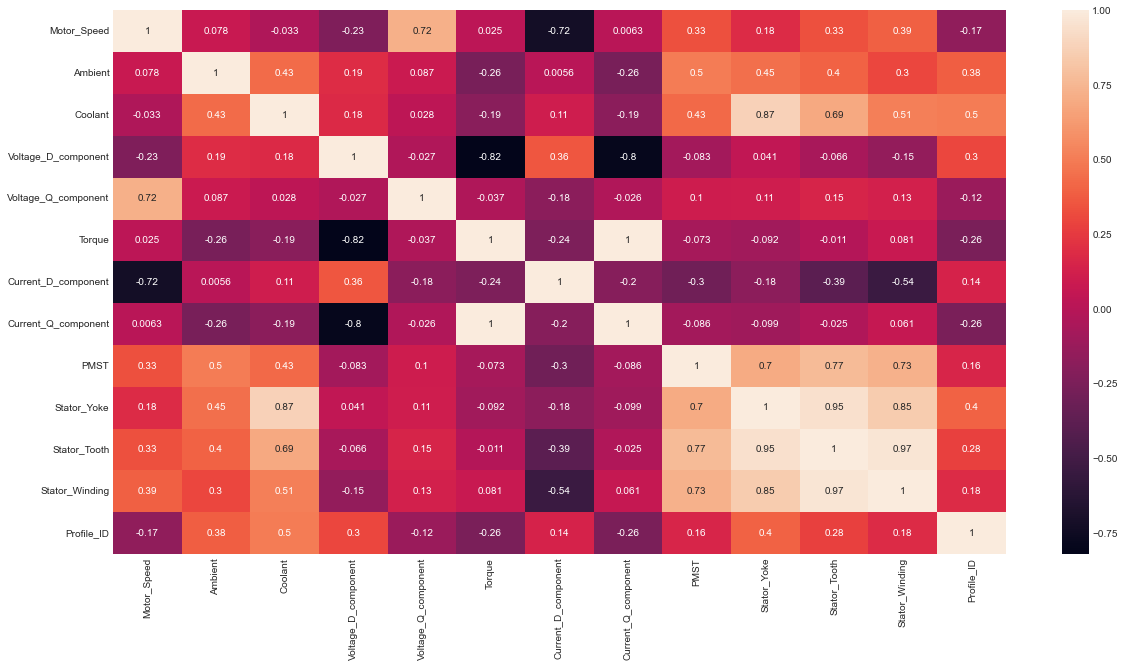

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(New_Data.corr(),annot=True,color="white")

In [14]:
New_Data.shape

(998070, 13)

ValueError: num must be 1 <= num <= 12, not 13

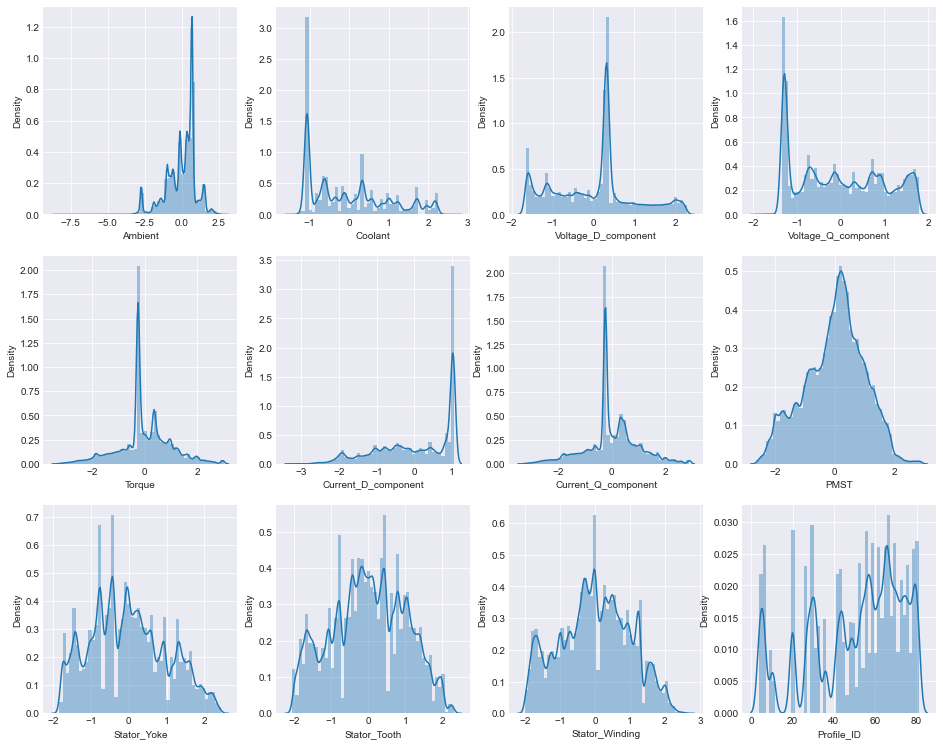

In [15]:
#plotting Distribution plot
plt.figure(figsize=(16,13))
for i in range(len(New_Data.columns)):
    plt.subplot(3,4,i+1)
    sns.distplot(New_Data[New_Data.columns[i+1]])
plt.show()

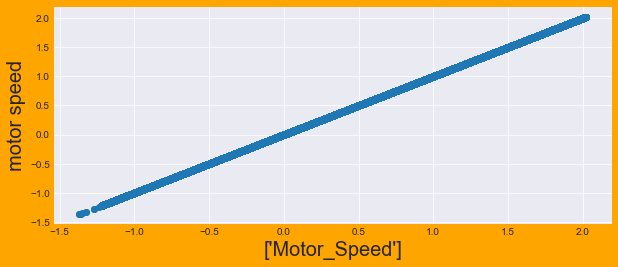

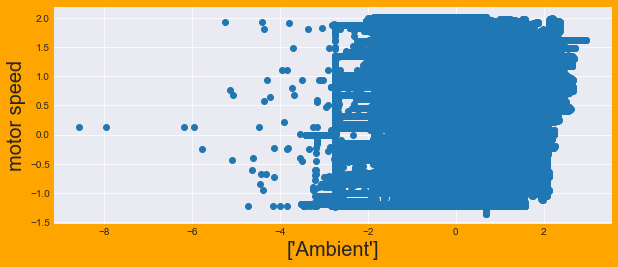

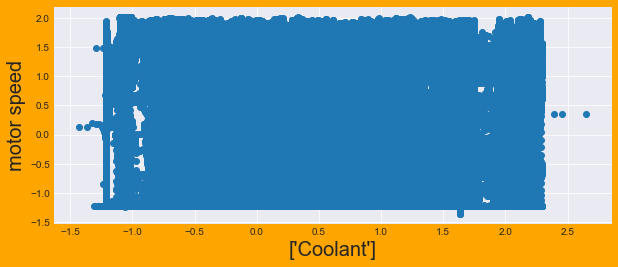

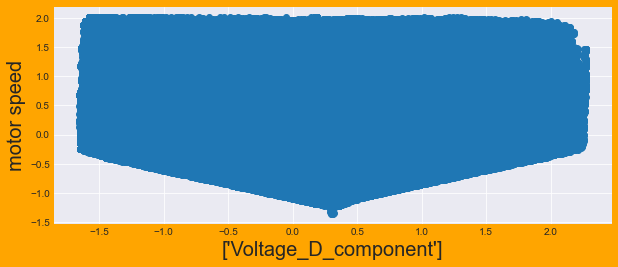

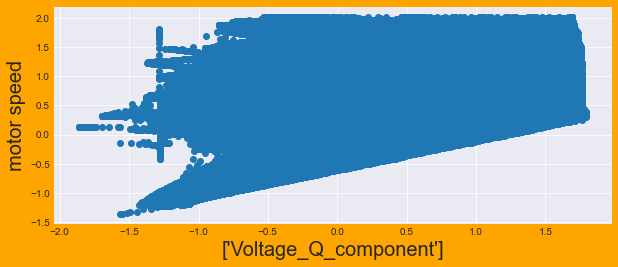

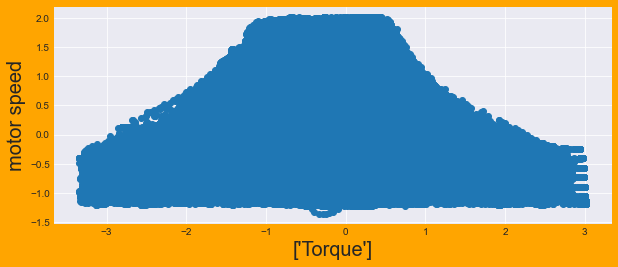

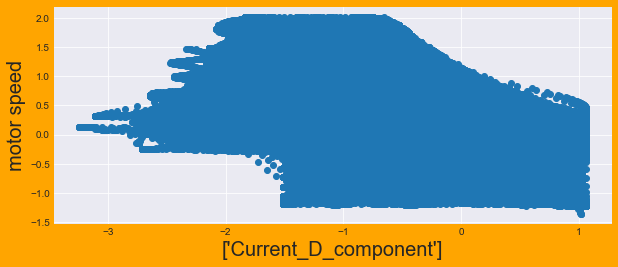

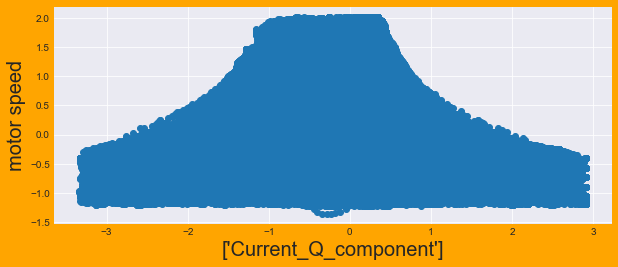

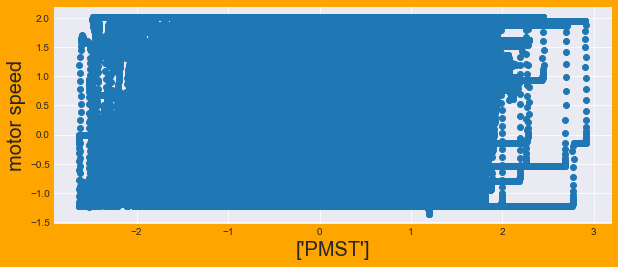

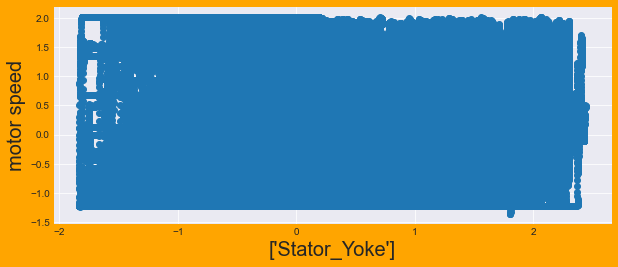

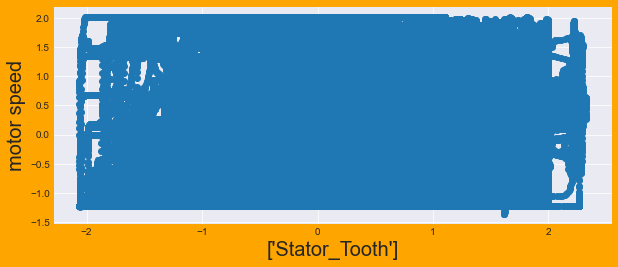

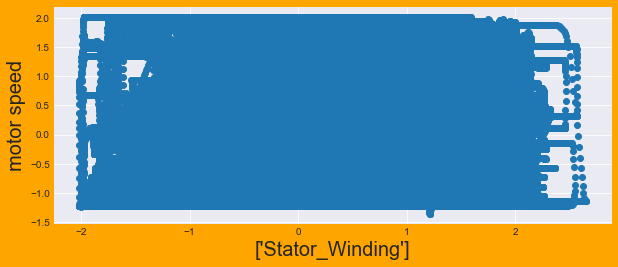

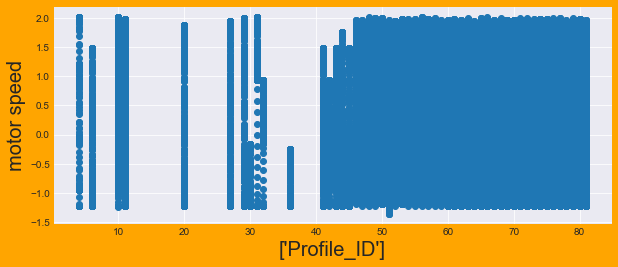

In [18]:
# let's plot all the columns to look at their distributions
#H=['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d','i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding','profile_id']
for i in New_Data.columns:
    plt.figure(figsize=(10, 4),facecolor="orange")
    plt.scatter(data[i],New_Data["Motor_Speed"])
    plt.xlabel([i], size=20)
    plt.ylabel('motor speed',size=20)
    plt.show()

ValueError: num must be 1 <= num <= 12, not 13

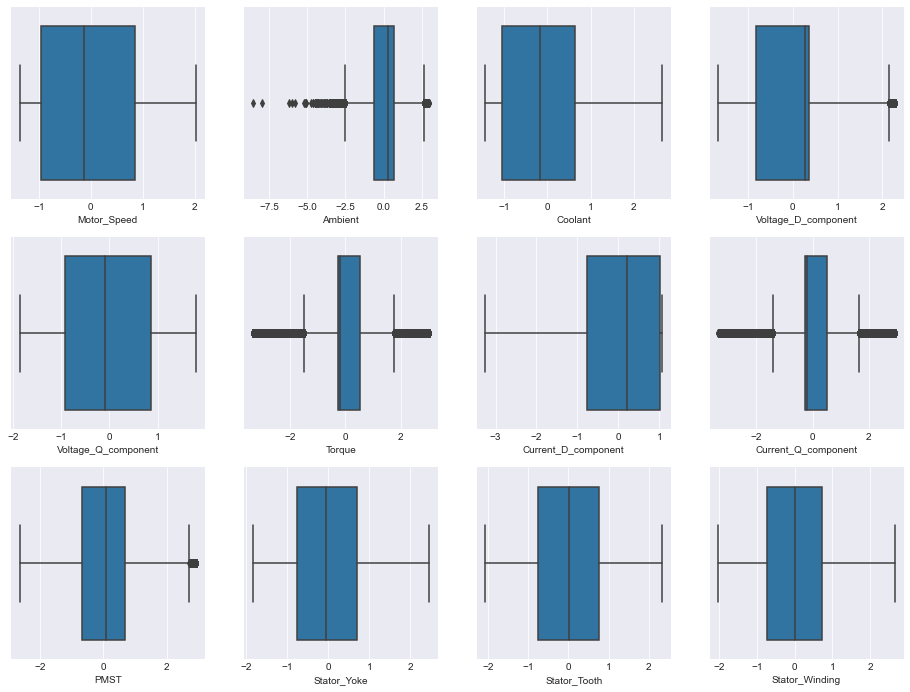

In [19]:
#plotting box plot 
plt.figure(figsize=(16,12))
for i in range(len(New_Data.columns)):
    plt.subplot(3,4,i+1)
    sns.boxplot(New_Data[New_Data.columns[i]])
plt.show()

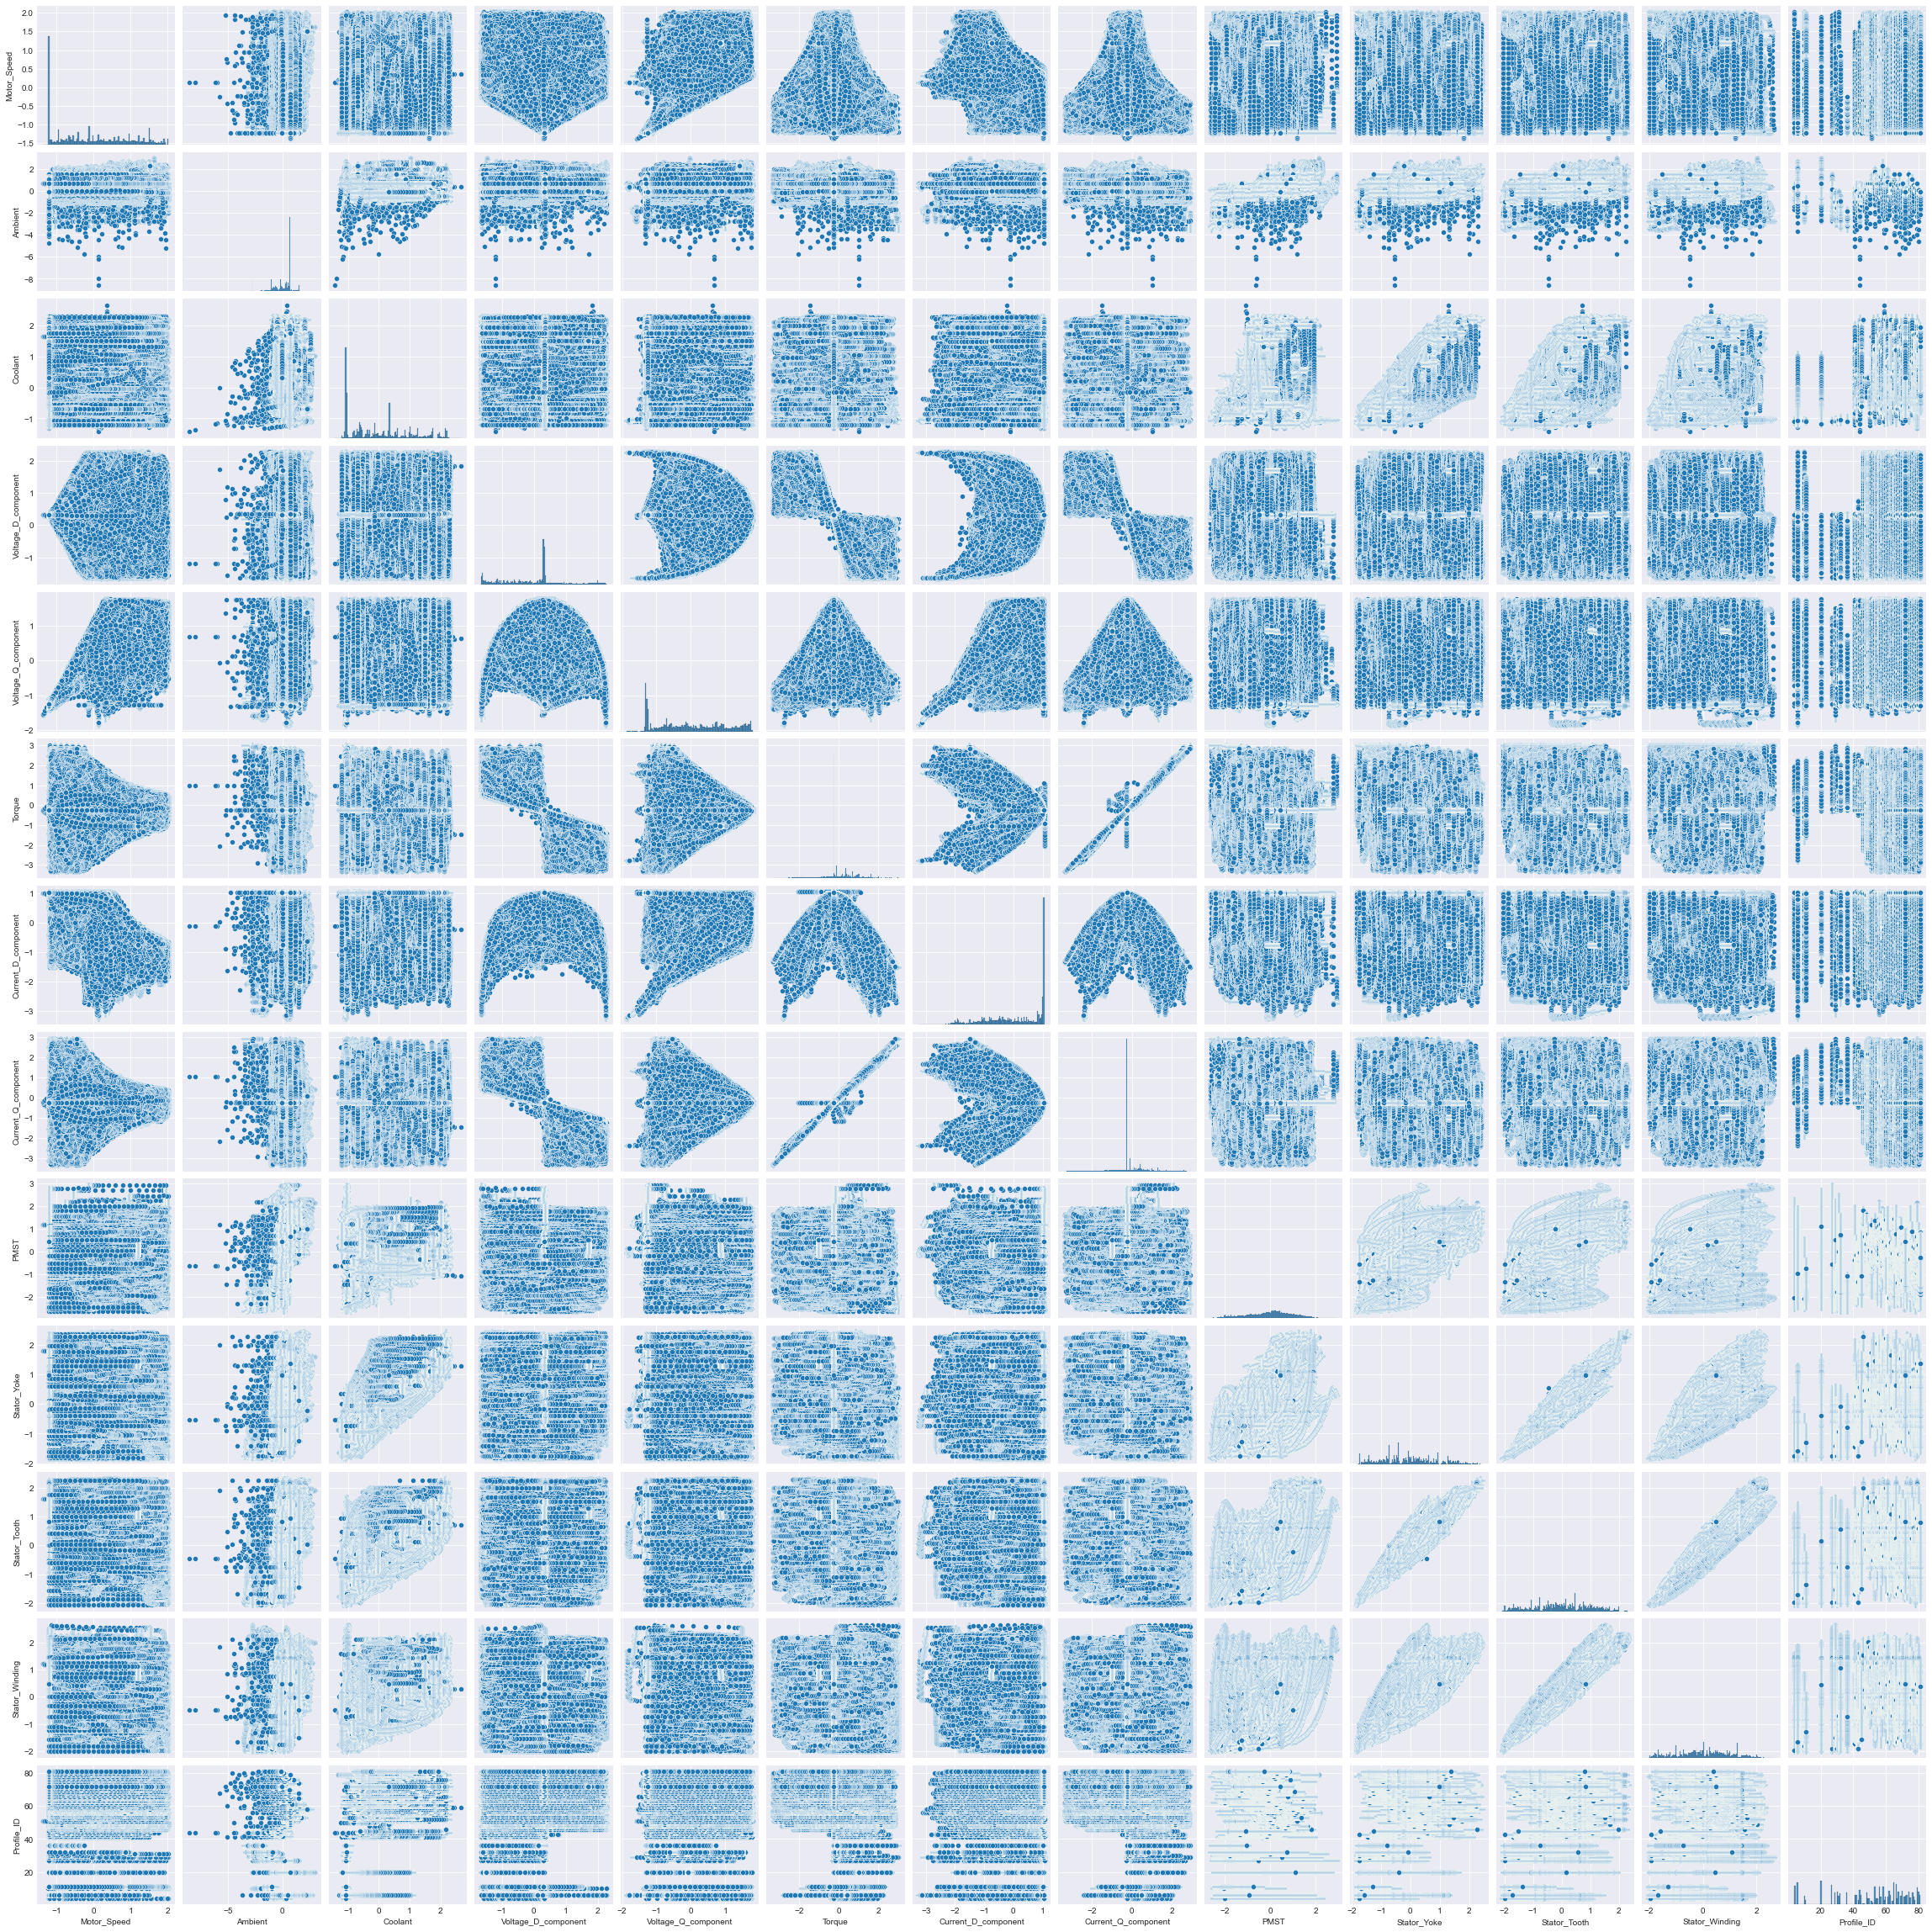

In [21]:
sns.pairplot(New_Data)

# VIF Calculation

In [14]:
rsq_Ambient = smf.ols("Ambient ~ Coolant + Voltage_D_component + Voltage_Q_component + Torque + Current_D_component + Current_Q_component + PMST + Stator_Yoke + Stator_Tooth + Stator_Winding+ Profile_ID", data=data).fit().rsquared
vif_Ambient = 1/(1-rsq_Ambient)

rsq_Coolant = smf.ols("Coolant ~ Ambient + Voltage_D_component + Voltage_Q_component + Torque + Current_D_component + Current_Q_component + PMST + Stator_Yoke + Stator_Tooth + Stator_Winding+ Profile_ID", data=data).fit().rsquared
vif_Coolant = 1/(1-rsq_Coolant)

rsq_Voltage_D_component = smf.ols("Voltage_D_component ~ Ambient + Coolant + Voltage_Q_component + Torque + Current_D_component + Current_Q_component + PMST + Stator_Yoke + Stator_Tooth + Stator_Winding+ Profile_ID", data=data).fit().rsquared
vif_Voltage_D_component = 1/(1-rsq_Voltage_D_component)

rsq_Voltage_Q_component = smf.ols("Voltage_Q_component ~ Ambient + Coolant + Voltage_D_component + Torque + Current_D_component + Current_Q_component + PMST + Stator_Yoke + Stator_Tooth + Stator_Winding+ Profile_ID", data=data).fit().rsquared
vif_Voltage_Q_component = 1/(1-rsq_Voltage_Q_component)

rsq_Torque = smf.ols("Torque ~ Ambient + Coolant + Voltage_Q_component + Voltage_Q_component + Current_D_component + Current_Q_component + PMST + Stator_Yoke + Stator_Tooth + Stator_Winding+ Profile_ID", data=data).fit().rsquared
vif_Torque = 1/(1-rsq_Torque)

rsq_Current_Q_component = smf.ols("Current_Q_component ~ Ambient + Coolant + Voltage_Q_component + Voltage_Q_component + Torque + Current_D_component + PMST + Stator_Yoke + Stator_Tooth + Stator_Winding+ Profile_ID", data=data).fit().rsquared
vif_Current_Q_component = 1/(1-rsq_Current_Q_component)

rsq_Current_D_component = smf.ols("Current_D_component ~ Ambient + Coolant + Voltage_Q_component + Voltage_Q_component + Torque + Current_Q_component + PMST + Stator_Yoke + Stator_Tooth + Stator_Winding+ Profile_ID", data=data).fit().rsquared
vif_Current_D_component = 1/(1-rsq_Current_D_component)

rsq_PMST = smf.ols("PMST ~ Ambient + Coolant + Voltage_Q_component + Voltage_Q_component + Torque + Current_Q_component + Current_D_component + Stator_Yoke + Stator_Tooth + Stator_Winding+ Profile_ID", data=data).fit().rsquared
vif_PMST = 1/(1-rsq_PMST)

rsq_Stator_Yoke = smf.ols("Stator_Yoke ~ Ambient + Coolant + Voltage_Q_component + Voltage_Q_component + Torque + Current_Q_component + Current_D_component + PMST + Stator_Tooth + Stator_Winding+ Profile_ID", data=data).fit().rsquared
vif_Stator_Yoke = 1/(1-rsq_Stator_Yoke)

rsq_Stator_Tooth = smf.ols("Stator_Tooth ~ Ambient + Coolant + Voltage_Q_component + Voltage_Q_component + Torque + Current_Q_component + Current_D_component + PMST + Stator_Yoke + Stator_Winding+ Profile_ID", data=data).fit().rsquared
vif_Stator_Tooth = 1/(1-rsq_Stator_Tooth)

rsq_Stator_Winding = smf.ols("Stator_Winding ~ Ambient + Coolant + Voltage_Q_component + Voltage_Q_component + Torque + Current_Q_component + Current_D_component + PMST + Stator_Yoke + Stator_Tooth + Profile_ID", data=data).fit().rsquared
vif_Stator_Winding = 1/(1-rsq_Stator_Winding)

rsq_Profile_ID = smf.ols("Profile_ID ~ Ambient + Coolant + Voltage_Q_component + Voltage_Q_component + Torque + Current_Q_component + Current_D_component + PMST + Stator_Yoke + Stator_Winding+ Stator_Tooth", data=data).fit().rsquared
vif_Profile_ID = 1/(1-rsq_Profile_ID)

In [15]:
VIF= {"Variables":['Ambient','Coolant','Voltage_D_component','Voltage_Q_component','Torque','Current_Q_component','Current_D_component','PMST','Stator_Yoke','Stator_Winding','Stator_Tooth','Profile_ID'],
      'VIF':[vif_Ambient, vif_Coolant, vif_Voltage_D_component, vif_Voltage_Q_component, vif_Torque, vif_Current_Q_component, vif_Current_D_component, vif_PMST, vif_Stator_Yoke, vif_Stator_Winding, vif_Stator_Tooth, vif_Profile_ID]}
VIF_df = pd.DataFrame(VIF)
VIF_df

Variables         VIF
0               Ambient    1.688646
1               Coolant   39.402307
2   Voltage_D_component    4.759660
3   Voltage_Q_component    1.519728
4                Torque  193.483442
5   Current_Q_component  189.868569
6   Current_D_component    2.939579
7                  PMST    4.247227
8           Stator_Yoke  356.752414
9        Stator_Winding  146.668203
10         Stator_Tooth  606.911896
11           Profile_ID    1.522807

In [16]:
VIF_df[VIF_df.VIF>10]

Variables         VIF
1               Coolant   39.402307
4                Torque  193.483442
5   Current_Q_component  189.868569
8           Stator_Yoke  356.752414
9        Stator_Winding  146.668203
10         Stator_Tooth  606.911896

In [17]:
len(VIF_df[VIF_df.VIF>10])

6

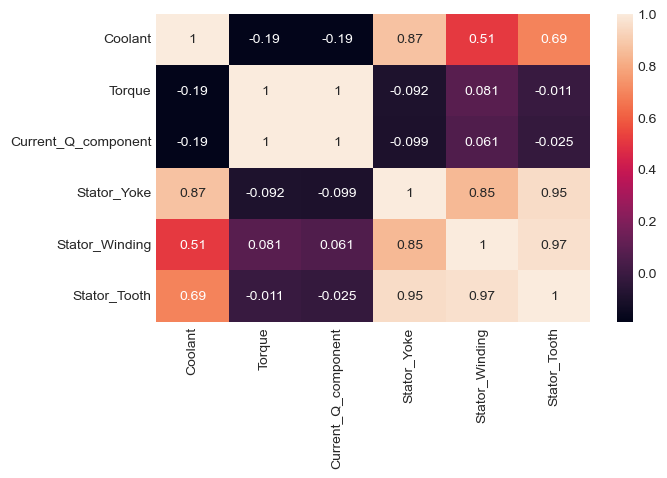

In [18]:
plt.figure(figsize=(7,4))
sns.heatmap(New_Data[["Coolant","Torque","Current_Q_component","Stator_Yoke","Stator_Winding","Stator_Tooth"]].corr(),annot=True,color="white")
plt.show()

In [19]:
final_Data=New_Data.copy()

In [20]:
final_Data=final_Data.drop(columns=['Torque','Stator_Yoke','Stator_Tooth'],axis=1)
final_Data

Motor_Speed   Ambient   Coolant  Voltage_D_component  \
0         -1.222428 -0.752143 -1.118446             0.327935   
1         -1.222429 -0.771263 -1.117021             0.329665   
2         -1.222428 -0.782892 -1.116681             0.332771   
3         -1.222430 -0.780935 -1.116764             0.333700   
4         -1.222429 -0.774043 -1.116775             0.335206   
...             ...       ...       ...                  ...   
998065    -1.222428 -0.047497  0.341638             0.331475   
998066    -1.222437 -0.048839  0.320022             0.331701   
998067    -1.222430 -0.042350  0.307415             0.330946   
998068    -1.222432 -0.039433  0.302082             0.330987   
998069    -1.222431 -0.043803  0.312666             0.330830   

        Voltage_Q_component  Current_D_component  Current_Q_component  \
0                 -1.297858             1.029572            -0.245860   
1                 -1.297686             1.029509            -0.245832   
2                 -1.301822             1.029448            -0.245818   
3                 -1.301852             1.032845            -0.246955   
4                 -1.303118             1.031807            -0.246610   
...                     ...                  ...                  ...   
998065            -1.246114             1.029142            -0.245723   
998066            -1.250655             1.029148            -0.245736   
998067            -1.246852             1.029191            -0.245701   
998068            -1.249505             1.029147            -0.245727   
998069            -1.246590             1.029141            -0.245722   

            PMST  Stator_Winding  Profile_ID  
0      -2.522071       -2.018033           4  
1      -2.522418       -2.017631           4  
2      -2.522673       -2.017343           4  
3      -2.521639       -2.017632           4  
4      -2.521900       -2.018145           4  
...          ...             ...         ...  
998065  0.429853        0.494725          72  
998066  0.429751        0.494279          72  
998067  0.429439        0.492666          72  
998068  0.429558        0.490581          72  
998069  0.429166        0.489382          72  

[998070 rows x 10 columns]

In [21]:
#From above vif observation we came to the conclusion that out of 13 features 7 features are independent of each other and 
#remaining 6  features are dependent on each other so we for optimized result we will reselect the features for our model

After completing the EDA, we got better understanding of our dataset and the relationships between the features. Based on this understanding, now we can choose an appropriate model for our problem.

# 4- Model Building

# 4.1.1 - Linear Regression

# Building Model with selected features 

In [30]:
model0 = smf.ols("Motor_Speed ~ Ambient+Coolant + Voltage_D_component + Voltage_Q_component + Current_D_component + Current_Q_component + PMST  + Stator_Winding", data=final_Data).fit()


In [31]:
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Motor_Speed   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.412e+06
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:23:52   Log-Likelihood:            -1.6445e+05
No. Observations:              998070   AIC:                         3.289e+05
Df Residuals:                  998061   BIC:                         3.290e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0007      0.000      2.597      0.009       0.000       0.001
Ambient                -0.0537      0.000   -148.145      0.000      -0.054      -0.053
Coolant                 0.0495      0.000    120.202      0.000       0.049       0.050
Voltage_D_component    -0.1813      0.001   -349.319      0.000      -0.182      -0.180
Voltage_Q_component     0.5954      0.000   2044.095      0.000       0.595       0.596
Current_D_component    -0.6507      0.000  -1532.239      0.000      -0.652      -0.650
Current_Q_component    -0.2320      0.001   -461.967      0.000      -0.233      -0.231
PMST                    0.1892      0.000    388.493      0.000       0.188       0.190
Stator_Winding         -0.1923      0.001   -324.612      0.000      -0.193      -0.191
==============================================================================
Omnibus:                    59458.965   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           230045.490
Skew:                          -0.177   Prob(JB):                         0.00
Kurtosis:                       5.325   Cond. No.                         4.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model0.params

Intercept              0.000742
Ambient               -0.053668
Coolant                0.049495
Voltage_D_component   -0.181347
Voltage_Q_component    0.595396
Current_D_component   -0.650700
Current_Q_component   -0.232008
PMST                   0.189161
Stator_Winding        -0.192270
dtype: float64

In [33]:
model0.predict()

array([-1.54842963, -1.54765272, -1.5501044 , ..., -1.41033816,
       -1.4118879 , -1.40920661])

# Building model using all features

In [34]:
first_model=smf.ols('Motor_Speed~Ambient+Coolant+Voltage_D_component+Voltage_Q_component+Torque+Current_D_component+Current_Q_component+PMST+Stator_Yoke+Stator_Tooth+Stator_Winding',data=New_Data).fit()

In [35]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Motor_Speed   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.171e+06
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:23:54   Log-Likelihood:            -1.0388e+05
No. Observations:              998070   AIC:                         2.078e+05
Df Residuals:                  998058   BIC:                         2.079e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0006      0.000      2.399      0.016       0.000       0.001
Ambient                -0.0504      0.000   -147.501      0.000      -0.051      -0.050
Coolant                 0.4102      0.002    244.356      0.000       0.407       0.413
Voltage_D_component    -0.1661      0.001   -285.502      0.000      -0.167      -0.165
Voltage_Q_component     0.5395      0.000   1646.147      0.000       0.539       0.540
Torque                 -0.3442      0.004    -79.190      0.000      -0.353      -0.336
Current_D_component    -0.6577      0.000  -1417.144      0.000      -0.659      -0.657
Current_Q_component     0.1381      0.004     33.779      0.000       0.130       0.146
PMST                    0.1063      0.001    191.352      0.000       0.105       0.107
Stator_Yoke            -1.6290      0.005   -315.783      0.000      -1.639      -1.619
Stator_Tooth            2.3192      0.007    340.321      0.000       2.306       2.333
Stator_Winding         -1.1684      0.003   -346.265      0.000      -1.175      -1.162
==============================================================================
Omnibus:                    53747.933   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           205507.215
Skew:                          -0.118   Prob(JB):                         0.00
Kurtosis:                       5.210   Cond. No.                         69.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
first_model.params

Intercept              0.000645
Ambient               -0.050356
Coolant                0.410205
Voltage_D_component   -0.166065
Voltage_Q_component    0.539547
Torque                -0.344221
Current_D_component   -0.657691
Current_Q_component    0.138085
PMST                   0.106285
Stator_Yoke           -1.628973
Stator_Tooth           2.319161
Stator_Winding        -1.168371
dtype: float64

In [37]:
first_model.predict()

array([-1.51858744, -1.51581594, -1.51716107, ..., -1.45128241,
       -1.45443358, -1.43307244])

# Calculating Z-score to eliminate the outliers in the given dataset

In [22]:

# Load the data into a Pandas DataFrame
final_csv= pd.read_csv('temperature_data.csv')

# Calculate the Z-scores for each column
z_scores = np.abs(final_csv - final_csv.mean()) / final_csv.std()

# Define a threshold value (e.g. 3 standard deviations)
threshold = 3

# Identify the rows that have any column with a Z-score greater than the threshold
outliers = (z_scores > threshold).any(axis=1)

# Remove the outliers
final_csv = final_csv[~outliers]

# Save the cleaned data to a new file
final_csv.to_csv('cleaned_data.csv', index=False)


In [23]:
Project_Data=pd.read_csv("cleaned_data.csv")

In [24]:
Project_Data.shape

(990207, 13)

In [25]:
Project_Data

ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
...          ...       ...       ...       ...          ...       ...   
990202 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.255640   
990203 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.255640   
990204 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.255640   
990205 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.255640   
990206 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.255640   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.029572 -0.245860 -2.522071    -1.831422     -2.066143   
1       1.029509 -0.245832 -2.522418    -1.830969     -2.064859   
2       1.029448 -0.245818 -2.522673    -1.830400     -2.064073   
3       1.032845 -0.246955 -2.521639    -1.830333     -2.063137   
4       1.031807 -0.246610 -2.521900    -1.830498     -2.062795   
...          ...       ...       ...          ...           ...   
990202  1.029142 -0.245723  0.429853     1.018568      0.836084   
990203  1.029148 -0.245736  0.429751     1.013416      0.834438   
990204  1.029191 -0.245701  0.429439     1.002906      0.833936   
990205  1.029147 -0.245727  0.429558     0.999157      0.830504   
990206  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  profile_id  
0            -2.018033           4  
1            -2.017631           4  
2            -2.017343           4  
3            -2.017632           4  
4            -2.018145           4  
...                ...         ...  
990202        0.494725          72  
990203        0.494279          72  
990204        0.492666          72  
990205        0.490581          72  
990206        0.489382          72  

[990207 rows x 13 columns]

In [26]:
Project_Data=Project_Data[['motor_speed','ambient', 'coolant', 'u_d', 'u_q', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id']]
Project_Data

motor_speed   ambient   coolant       u_d       u_q    torque  \
0         -1.222428 -0.752143 -1.118446  0.327935 -1.297858 -0.250182   
1         -1.222429 -0.771263 -1.117021  0.329665 -1.297686 -0.249133   
2         -1.222428 -0.782892 -1.116681  0.332771 -1.301822 -0.249431   
3         -1.222430 -0.780935 -1.116764  0.333700 -1.301852 -0.248636   
4         -1.222429 -0.774043 -1.116775  0.335206 -1.303118 -0.248701   
...             ...       ...       ...       ...       ...       ...   
990202    -1.222428 -0.047497  0.341638  0.331475 -1.246114 -0.255640   
990203    -1.222437 -0.048839  0.320022  0.331701 -1.250655 -0.255640   
990204    -1.222430 -0.042350  0.307415  0.330946 -1.246852 -0.255640   
990205    -1.222432 -0.039433  0.302082  0.330987 -1.249505 -0.255640   
990206    -1.222431 -0.043803  0.312666  0.330830 -1.246590 -0.255640   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.029572 -0.245860 -2.522071    -1.831422     -2.066143   
1       1.029509 -0.245832 -2.522418    -1.830969     -2.064859   
2       1.029448 -0.245818 -2.522673    -1.830400     -2.064073   
3       1.032845 -0.246955 -2.521639    -1.830333     -2.063137   
4       1.031807 -0.246610 -2.521900    -1.830498     -2.062795   
...          ...       ...       ...          ...           ...   
990202  1.029142 -0.245723  0.429853     1.018568      0.836084   
990203  1.029148 -0.245736  0.429751     1.013416      0.834438   
990204  1.029191 -0.245701  0.429439     1.002906      0.833936   
990205  1.029147 -0.245727  0.429558     0.999157      0.830504   
990206  1.029141 -0.245722  0.429166     0.987163      0.828046   

        stator_winding  profile_id  
0            -2.018033           4  
1            -2.017631           4  
2            -2.017343           4  
3            -2.017632           4  
4            -2.018145           4  
...                ...         ...  
990202        0.494725          72  
990203        0.494279          72  
990204        0.492666          72  
990205        0.490581          72  
990206        0.489382          72  

[990207 rows x 13 columns]

In [27]:
Project_Data=Project_Data.drop(columns=['torque','stator_yoke','stator_tooth','profile_id'])
Project_Data

motor_speed   ambient   coolant       u_d       u_q       i_d  \
0         -1.222428 -0.752143 -1.118446  0.327935 -1.297858  1.029572   
1         -1.222429 -0.771263 -1.117021  0.329665 -1.297686  1.029509   
2         -1.222428 -0.782892 -1.116681  0.332771 -1.301822  1.029448   
3         -1.222430 -0.780935 -1.116764  0.333700 -1.301852  1.032845   
4         -1.222429 -0.774043 -1.116775  0.335206 -1.303118  1.031807   
...             ...       ...       ...       ...       ...       ...   
990202    -1.222428 -0.047497  0.341638  0.331475 -1.246114  1.029142   
990203    -1.222437 -0.048839  0.320022  0.331701 -1.250655  1.029148   
990204    -1.222430 -0.042350  0.307415  0.330946 -1.246852  1.029191   
990205    -1.222432 -0.039433  0.302082  0.330987 -1.249505  1.029147   
990206    -1.222431 -0.043803  0.312666  0.330830 -1.246590  1.029141   

             i_q        pm  stator_winding  
0      -0.245860 -2.522071       -2.018033  
1      -0.245832 -2.522418       -2.017631  
2      -0.245818 -2.522673       -2.017343  
3      -0.246955 -2.521639       -2.017632  
4      -0.246610 -2.521900       -2.018145  
...          ...       ...             ...  
990202 -0.245723  0.429853        0.494725  
990203 -0.245736  0.429751        0.494279  
990204 -0.245701  0.429439        0.492666  
990205 -0.245727  0.429558        0.490581  
990206 -0.245722  0.429166        0.489382  

[990207 rows x 9 columns]

# Splitting tha data into X and Y

In [28]:

X=Project_Data.iloc[:,1:]
Y=Project_Data.iloc[:,0]

### The Above Data is free from outlier null values and we are going to use this data in our model building process

# 4.2 - Apply Decision Tree Model

In [29]:
X

ambient   coolant       u_d       u_q       i_d       i_q        pm  \
0      -0.752143 -1.118446  0.327935 -1.297858  1.029572 -0.245860 -2.522071   
1      -0.771263 -1.117021  0.329665 -1.297686  1.029509 -0.245832 -2.522418   
2      -0.782892 -1.116681  0.332771 -1.301822  1.029448 -0.245818 -2.522673   
3      -0.780935 -1.116764  0.333700 -1.301852  1.032845 -0.246955 -2.521639   
4      -0.774043 -1.116775  0.335206 -1.303118  1.031807 -0.246610 -2.521900   
...          ...       ...       ...       ...       ...       ...       ...   
990202 -0.047497  0.341638  0.331475 -1.246114  1.029142 -0.245723  0.429853   
990203 -0.048839  0.320022  0.331701 -1.250655  1.029148 -0.245736  0.429751   
990204 -0.042350  0.307415  0.330946 -1.246852  1.029191 -0.245701  0.429439   
990205 -0.039433  0.302082  0.330987 -1.249505  1.029147 -0.245727  0.429558   
990206 -0.043803  0.312666  0.330830 -1.246590  1.029141 -0.245722  0.429166   

        stator_winding  
0            -2.018033  
1            -2.017631  
2            -2.017343  
3            -2.017632  
4            -2.018145  
...                ...  
990202        0.494725  
990203        0.494279  
990204        0.492666  
990205        0.490581  
990206        0.489382  

[990207 rows x 8 columns]

In [30]:
Y

0        -1.222428
1        -1.222429
2        -1.222428
3        -1.222430
4        -1.222429
            ...   
990202   -1.222428
990203   -1.222437
990204   -1.222430
990205   -1.222432
990206   -1.222431
Name: motor_speed, Length: 990207, dtype: float64

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,shuffle=True, random_state=10)

In [32]:
DTmodel = DecisionTreeRegressor(max_depth=3,splitter='best',random_state=10,max_features=None)
DTmodel.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3, random_state=10)

In [53]:
Y_pred=DTmodel.predict(X_test)

In [54]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.09530946160596127


As the value of MSE is very small we can say that the model is performing better because Lower MSE indicates better performance.


In [55]:
# Calculate the mean Absolute Error of the prediction
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.21745400728098005


As the value of MAE is 0.12 we can say that the model is performing better because Lower MAE indicates better performance.

In [56]:
# Calculate the Rsquare value of the prediction
r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)

R-squared: 0.905109248256127


As R-squared value ranges from 0 to 1, where 1 indicates a perfect fit, and values closer to 1 indicate better performance so
our value is 0.90 means it is  a good one and our model is performing better

In [57]:
# Calculate root mean square error
RMSE=np.sqrt(mse)
print("RMSE:", RMSE)

RMSE: 0.30872230500234554


In [58]:
MAPE=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
print('MAPE:',MAPE)

MAPE: 1.433230685874174


In [59]:
DecisionTree_Results=pd.DataFrame({ 
'Attribute':['Regressor','MSE','MAE','R-Square','RMSE','Mape'],'Value':['Decision_TreeRegressor',mse,mae,r2,RMSE,MAPE]})

In [60]:
DecisionTree_Results

Attribute                   Value
0  Regressor  Decision_TreeRegressor
1        MSE                0.095309
2        MAE                0.217454
3   R-Square                0.905109
4       RMSE                0.308722
5       Mape                1.433231

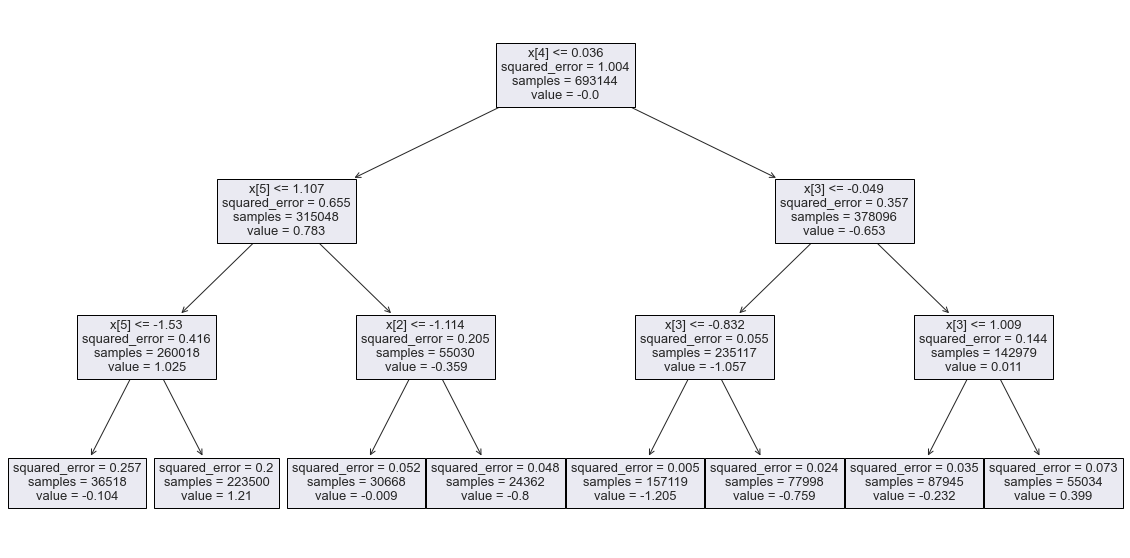

In [61]:
#ploting Decision Tree

plt.figure(figsize=(20, 10))
tree.plot_tree(DTmodel)
plt.show()

# Implementing Grid Search CV

In [62]:
# define the parameter grid
param_grid = {'max_depth': [1, 2, 3, 4, 5],
              'min_samples_split': [2, 4, 6, 8, 10]}

# create the grid search object
DTgrid_search = GridSearchCV(DTmodel, param_grid, cv=5)

# fit the grid search to the data
DTgrid_search.fit(X_train, Y_train)

# Get the Best Parameters
print("Best parameters:", DTgrid_search.best_params_)
print("Best score:", DTgrid_search.best_score_)



Best parameters: {'max_depth': 5, 'min_samples_split': 2}
Best score: 0.9610406600894315


# Implementing best parameters 

In [63]:
#building model with hypermetune parameters
GridDTmodel = DecisionTreeRegressor(max_depth=5,splitter='best',random_state=10,max_features=None,min_samples_split= 2)
GridDTmodel.fit(X_train, Y_train)


DecisionTreeRegressor(max_depth=5, random_state=10)

In [64]:
GDY_pred=GridDTmodel.predict(X_test)

In [65]:
#Calculating The optimized values
GDmse = mean_squared_error(Y_test, GDY_pred)
print("Mean Squared Error:", GDmse)
GDmae = mean_absolute_error(Y_test, GDY_pred)
print("Mean Absolute Error:", GDmae)
GDr2 = r2_score(Y_test, GDY_pred)
print("R-squared:", r2)
GDRMSE=np.sqrt(GDmse)
print("RMSE:", GDRMSE)

Mean Squared Error: 0.03867504848421241
Mean Absolute Error: 0.11785457759045885
R-squared: 0.905109248256127
RMSE: 0.1966597276623061


In [66]:
Evaluation=pd.DataFrame(columns = ['Model', 'R_square', 'Mean_Squared_Error', 'Mean_Absolute_Error', 'Root_Mean_Squared_Error','Mean_Absolute_Percentage_Error'])

In [67]:
L2=["DecisionTreeRegressor", GDr2, GDmse, GDmae, GDRMSE,'Nan']
Evaluation.loc[len (Evaluation), :]=L2
Evaluation

Model  R_square Mean_Squared_Error Mean_Absolute_Error  \
0  DecisionTreeRegressor  0.961495           0.038675            0.117855   

  Root_Mean_Squared_Error Mean_Absolute_Percentage_Error  
0                 0.19666                            Nan

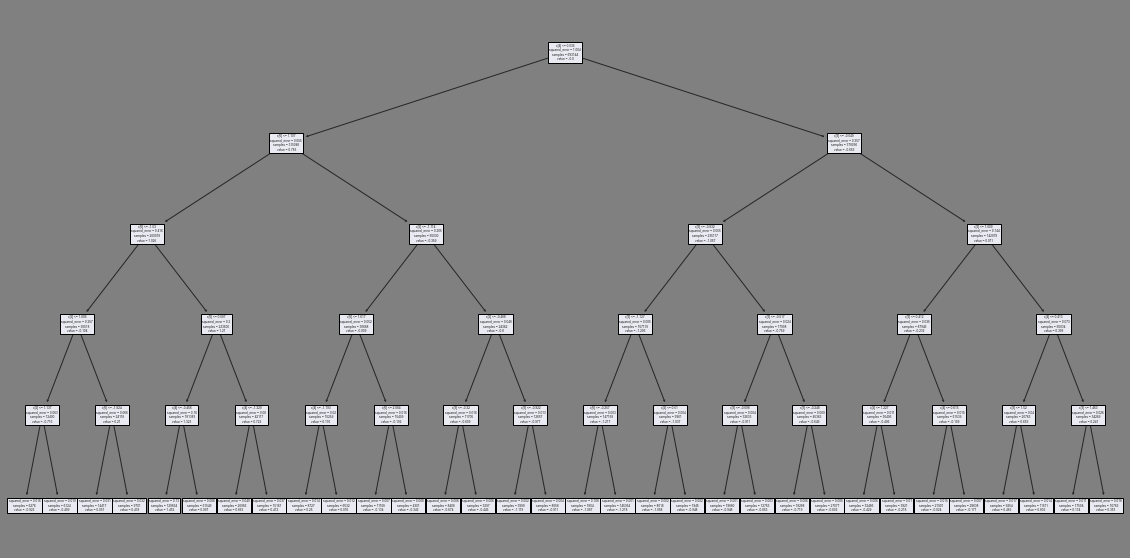

In [68]:
#Ploting again the optimized Decision Tree
plt.figure(figsize=(20, 10),facecolor='grey')
tree.plot_tree(GridDTmodel)
plt.show()

# 4.3- Apply Random Forest Model

In [33]:
RFmodel = RandomForestRegressor(max_depth=3,random_state=10,max_features='auto')
RFmodel.fit(X_train, Y_train)

RandomForestRegressor(max_depth=3, random_state=10)

In [34]:
RFY_pred=RFmodel.predict(X_test)

In [35]:
# Calculate the mean squared error of the predictions
RFmse = mean_squared_error(Y_test, RFY_pred)
print("Mean Squared Error:", RFmse)

Mean Squared Error: 0.09446627073109339


In [36]:
# Calculate the mean Absolute Error of the prediction
RFmae = mean_absolute_error(Y_test, RFY_pred)
print("Mean Absolute Error:", RFmae)

Mean Absolute Error: 0.21661259635387142


In [37]:
# Calculate the Rsquare value of the prediction
RFr2 = r2_score(Y_test, RFY_pred)
print("R-squared:", RFr2)

R-squared: 0.9059487348572641


In [38]:
# Calculate root mean square error
RF_RMSE=np.sqrt(RFmse)
print("RMSE:", RF_RMSE)

RMSE: 0.3073536574226723


In [39]:
RF_MAPE=metrics.mean_absolute_percentage_error(Y_test,RFY_pred)
print("MAPE:",RF_MAPE)

MAPE: 1.4269095238669391


In [40]:
RandomForest_Results=pd.DataFrame({ 
'Attribute':['Regressor','MSE','MAE','R-Square','RMSE','Mape'],'Value':['RandomForest_Regressor',RFmse,RFmae,RFr2,RF_RMSE,RF_MAPE]})

In [41]:
RandomForest_Results

Attribute                   Value
0  Regressor  RandomForest_Regressor
1        MSE                0.094466
2        MAE                0.216613
3   R-Square                0.905949
4       RMSE                0.307354
5       Mape                 1.42691

# Implementing Randomized Search CV

In [78]:
## Ooutput of this code is obtained in GOOGLE colab using GPU Server.
# regr = RandomForestRegressor(random_state=0)

# # Define the parameter distributions to sample from during search
# param_distributions = {
#     'n_estimators':[25,50,75],
#     'max_depth': [5, 10, 20],
#     'min_samples_split':[1,2,3,4,5],
#     'min_samples_leaf': [1,2,3,4,5],
#     'max_features': ['auto', 'sqrt', None]
# }

# random_search = RandomizedSearchCV(regr, param_distributions, random_state=0,n_jobs=-1,verbose=2)
# import time
# start = time.time()
# random_search.fit(X_train,Y_train)

# print("Time taken to complete:", time.time() - start, "seconds")
# print(random_search.best_params_)
# print(random_search.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Time taken to complete: 832.37464594841 seconds
{'n_estimators': 75, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 20}
RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=3, n_estimators=75, random_state=0)

# Implementing Best Parameters

In [42]:
#get optmized result using randomized search parameter
Random_RF_Model = RandomForestRegressor(max_depth=20,
                                        n_estimators=75,
                                        min_samples_split=3,
                                        min_samples_leaf=3,
                                        random_state=0,
                                        max_features='sqrt')
Random_RF_Model.fit(X_train, Y_train) 

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=3, n_estimators=75, random_state=0)

In [43]:
Random_RF_Y_predicted = Random_RF_Model.predict(X_test)

In [44]:
Random_RF_MSE = mean_squared_error(Y_test, Random_RF_Y_predicted)
Random_RF_RMSE = np.sqrt(Random_RF_MSE)
Random_RF_MAE = mean_absolute_error(Y_test, Random_RF_Y_predicted)
Random_RF_MAPE = mean_absolute_percentage_error(Y_test, Random_RF_Y_predicted)
Random_RF_r_score = r2_score(Y_test, Random_RF_Y_predicted)

In [45]:
L3=["RandomForest", Random_RF_r_score, Random_RF_MSE, Random_RF_MAE, Random_RF_RMSE,Random_RF_MAPE]
Evaluation.loc[len (Evaluation), :]=L3
Evaluation

NameError: name 'Evaluation' is not defined

# 4.4- Apply Ada Boost Regression Model

In [83]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Create the base regressor
Base_Regressor = DecisionTreeRegressor(max_depth=5)

# Create the AdaBoost Regressor
Ada_Boost_Regressor = AdaBoostRegressor(base_estimator = Base_Regressor, n_estimators=100)

# Fit the regressor
Ada_Boost_Regressor.fit(X_train, Y_train)

# Predict using the AdaBoost regressor
Ada_Boost_Y_pred = Ada_Boost_Regressor.predict(X_test)

# Calculate the mean squared error
Ada_Bost_MSE = mean_squared_error(Y_test, Ada_Boost_Y_pred)

# Calculate the Root mean squared error
Ada_Bost_RMSE = np.sqrt(Ada_Bost_MSE)

# Calculate the mean absolutate error
Ada_Bost_MAE = mean_absolute_error(Y_test, Ada_Boost_Y_pred)

# Calculate the mean absolutate percentage error
Ada_Bost_MAPE = mean_absolute_percentage_error(Y_test, Ada_Boost_Y_pred)

# Calculate the R^2 (coefficient of determination) regression score
Ada_Boost_r2_Score = r2_score(Y_test, Ada_Boost_Y_pred)

# Creating the data frame for the results
Ada_Boost_Result = pd.DataFrame({"Attribute":["Ada_Bost_MSE","Ada_Bost_RMSE","Ada_Bost_MAE","Ada_Bost_MAPE",'Ada_Boost_r2_Score']
                                ,"Values":[Ada_Bost_MSE,Ada_Bost_RMSE,Ada_Bost_MAE,Ada_Bost_MAPE,Ada_Boost_r2_Score]})
Ada_Boost_Result

Attribute    Values
0        Ada_Bost_MSE  0.010839
1       Ada_Bost_RMSE  0.104112
2        Ada_Bost_MAE  0.081176
3       Ada_Bost_MAPE  0.429973
4  Ada_Boost_r2_Score  0.989208

# Implementing Randomized Search Cv

In [84]:
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np

# Ada_reg = AdaBoostRegressor()

# param_dist = {
#  'n_estimators': [25, 50, 75, 100],
#  'learning_rate': [0.25, 0.45, 0.68, 0.85]
# }

# Ada_random_search = RandomizedSearchCV(Ada_reg, param_distributions=param_dist, cv=5, n_iter=10, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)

# Ada_random_search.fit(X_train, Y_train)

# print("Best parameters found: ",Ada_random_search.best_params_)
# print("Best score: ",Ada_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'n_estimators': 75, 'learning_rate': 0.68}
Best score:  -0.06176222716227857

# Implementing Best Parameters

In [85]:

# Create the base regressor
Base_Regressor = DecisionTreeRegressor(max_depth=5)
# Create the AdaBoost Regressor
Random_Ada_Boost_Regressor = AdaBoostRegressor(base_estimator = Base_Regressor, n_estimators=75,learning_rate= 0.68)

# Fit the regressor
Random_Ada_Boost_Regressor.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=0.68, n_estimators=75)

In [86]:
# Predict using the AdaBoost regressor
Random_Ada_Boost_Y_pred = Random_Ada_Boost_Regressor.predict(X_test)

In [87]:
Random_Ada_Bost_MSE = mean_squared_error(Y_test, Random_Ada_Boost_Y_pred)
Random_Ada_Bost_RMSE = np.sqrt(Random_Ada_Bost_MSE)
Random_Ada_Bost_MAE = mean_absolute_error(Y_test, Random_Ada_Boost_Y_pred)
Random_Ada_Bost_MAPE = mean_absolute_percentage_error(Y_test, Random_Ada_Boost_Y_pred)
Random_Ada_Boost_r2_Score = r2_score(Y_test, Random_Ada_Boost_Y_pred)

In [88]:
L4=["Ada_Boosting", Random_Ada_Boost_r2_Score, Random_Ada_Bost_MSE, Random_Ada_Bost_MAE, Random_Ada_Bost_RMSE,Random_Ada_Bost_MAPE]
Evaluation.loc[len (Evaluation), :]=L4
Evaluation

Model  R_square Mean_Squared_Error Mean_Absolute_Error  \
0  DecisionTreeRegressor  0.961495           0.038675            0.117855   
1           RandomForest  0.999738           0.000263             0.00624   
2           Ada_Boosting  0.989822           0.010223            0.075897   

  Root_Mean_Squared_Error Mean_Absolute_Percentage_Error  
0                 0.19666                            Nan  
1                0.016228                       0.038014  
2                0.101111                       0.479641

# 4.5- Apply GradientBoost Regression Model

In [89]:
# Create the Gradient Boosting Regressor
Gradient_Boost_Model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the regressor
Gradient_Boost_Model.fit(X_train, Y_train)

# Predict using the regressor
Gradient_Boost_Y_pred = Gradient_Boost_Model.predict(X_test)

# Calculate the mean squared error
Gradient_Boost_MSE = mean_squared_error(Y_test, Gradient_Boost_Y_pred)

# Calculate the Root mean squared error
Gradient_Boost_RMSE = np.sqrt(Gradient_Boost_MSE)

# Calculate the mean absolutate error
Gradient_Boost_MAE = mean_absolute_error(Y_test, Gradient_Boost_Y_pred)

# Calculate the mean absolutate percentage error
Gradient_Boost_MAPE = mean_absolute_percentage_error(Y_test, Gradient_Boost_Y_pred)

# Calculate the R^2 (coefficient of determination) regression score
Gradient_Boost_r2_Score = r2_score(Y_test, Gradient_Boost_Y_pred)

# Creating the data frame for the results
Gradient_Boost_Result = pd.DataFrame({"Attribute":["Gradient_Boost_MSE","Gradient_Boost_RMSE","Gradient_Boost_MAE","Gradient_Boost_MAPE",'Gradient_Boost_r2_Score']
                                ,"Values":[Gradient_Boost_MSE,Gradient_Boost_RMSE,Gradient_Boost_MAE,Gradient_Boost_MAPE,Gradient_Boost_r2_Score]})
Gradient_Boost_Result

Attribute    Values
0       Gradient_Boost_MSE  0.004183
1      Gradient_Boost_RMSE  0.064673
2       Gradient_Boost_MAE  0.042206
3      Gradient_Boost_MAPE  0.467851
4  Gradient_Boost_r2_Score  0.995836

#  Implementing Randomized Search CV

In [90]:
# # Define the Gradient Boosting Regressor
# Random_gbr = GradientBoostingRegressor()

# # Define the hyperparameters to be searched
# param_dist = {
   
#     "learning_rate": [0.01, 0.05, 0.1, 0.2],
#     "n_estimators": [50,75,100],
#     "max_depth": [2, 3, 4, 5, 6],
#     "min_samples_split": [2, 4, 6, 8, 10]
 
# }

# # Create the Randomized Search CV object
# rscv = RandomizedSearchCV(Random_gbr, param_distributions=param_dist, n_iter=10, cv=5, random_state=0, n_jobs=-1, verbose=1)

# # Fit the Randomized Search CV to the data
# rscv.fit(X_train, Y_train)

# # Print the best hyperparameters and score
# print("Best hyperparameters:", rscv.best_params_)
# print("Best score:", rscv.best_score_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 8, 'max_depth': 6, 'learning_rate': 0.1}
Best score: 0.9993676700667178

# Implementing Best Parameters

In [91]:
# Create the Gradient Boosting Regressor using Best Parameters
Random_Gradient_Boost_Model = GradientBoostingRegressor(n_estimators=100,min_samples_split=8,learning_rate=0.1, max_depth=6)


# Fit the regressor
Random_Gradient_Boost_Model.fit(X_train, Y_train)

# Predict using the regressor
Random_Gradient_Boost_Y_pred = Gradient_Boost_Model.predict(X_test)

In [92]:
Random_Gradient_Boost_MSE = mean_squared_error(Y_test, Random_Gradient_Boost_Y_pred)
Random_Gradient_Boost_RMSE = np.sqrt(Random_Gradient_Boost_MSE)
Random_Gradient_Boost_MAE = mean_absolute_error(Y_test, Random_Gradient_Boost_Y_pred)
Random_Gradient_Boost_MAPE = mean_absolute_percentage_error(Y_test, Random_Gradient_Boost_Y_pred)
Random_Gradient_Boost_r2_Score = r2_score(Y_test, Random_Gradient_Boost_Y_pred)




In [93]:
L5=["Gradient_Boosting", Random_Gradient_Boost_r2_Score, Random_Gradient_Boost_MSE, Random_Gradient_Boost_MAE, Random_Gradient_Boost_RMSE,Random_Gradient_Boost_MAPE]
Evaluation.loc[len (Evaluation), :]=L5
Evaluation

Model  R_square Mean_Squared_Error Mean_Absolute_Error  \
0  DecisionTreeRegressor  0.961495           0.038675            0.117855   
1           RandomForest  0.999738           0.000263             0.00624   
2           Ada_Boosting  0.989822           0.010223            0.075897   
3      Gradient_Boosting  0.995836           0.004183            0.042206   

  Root_Mean_Squared_Error Mean_Absolute_Percentage_Error  
0                 0.19666                            Nan  
1                0.016228                       0.038014  
2                0.101111                       0.479641  
3                0.064673                       0.467851

#  4.6- Apply Bagging Regression Model

In [94]:
# building the model
Bagg_Reg = DecisionTreeRegressor(random_state=10)
Bagging = BaggingRegressor(base_estimator=Bagg_Reg, n_estimators = 25, random_state= 10 )
Bagging.fit(X_train, Y_train)

# Predict using the Bagging regressor
Bagg_Reg_Y_Pred = Bagging.predict(X_test)

# Calculate the mean squared error
Bagging_Reg_MSE = mean_squared_error(Y_test, Bagg_Reg_Y_Pred)

# Calculate the Root mean squared error
Bagging_Reg_RMSE = np.sqrt(Bagging_Reg_MSE)

# Calculate the mean absolutate error
Bagging_Reg_MAE = mean_absolute_error(Y_test, Bagg_Reg_Y_Pred)

# Calculate the mean absolutate percentage error
Bagging_Reg_MAPE = mean_absolute_percentage_error(Y_test, Bagg_Reg_Y_Pred)

# Calculate the R^2 (coefficient of determination) regression score
Bagging_Reg_Score = r2_score(Y_test, Bagg_Reg_Y_Pred)

# Creating the data frame for the results
Bagging_Reg_Result = pd.DataFrame({"Attribute":["Bagging_Reg_MSE","Bagging_Reg_RMSE","Bagging_Reg_MAE","Bagging_Reg_MAPE",'Bagging_Reg_Score']
                                ,"Values":[Bagging_Reg_MSE,Bagging_Reg_RMSE,Bagging_Reg_MAE,Bagging_Reg_MAPE,Bagging_Reg_Score]})
Bagging_Reg_Result


Attribute    Values
0    Bagging_Reg_MSE  0.000164
1   Bagging_Reg_RMSE  0.012809
2    Bagging_Reg_MAE  0.003845
3   Bagging_Reg_MAPE  0.028910
4  Bagging_Reg_Score  0.999837

# Implementing Randomized Search CV

In [95]:
# from sklearn.ensemble import BaggingRegressor
# from scipy.stats import uniform, randint
# # Define the base regressor and bagging regressor
# base_regressor = DecisionTreeRegressor()
# bagging_regressor = BaggingRegressor(base_estimator=base_regressor)

# # Define the hyperparameters to be searched
# param_distributions = {
#     'n_estimators':[25,50,75,100],
#     'max_samples': uniform(0.1, 0.9),
#     'max_features': uniform(0.1, 0.9),
#     'n_jobs': [None, 1, 2, -1],
#     'random_state': [None, randint(0, 100)]
# }

# # Use RandomizedSearchCV to search for the best hyperparameters
# random_search = RandomizedSearchCV(bagging_regressor, param_distributions, n_iter=10, cv=5, n_jobs=-1, verbose=1)
# random_search.fit(X_train,Y_train)

# # Print the best hyperparameters found
# print('Best Hyperparameters:', random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'max_features': 0.9702271229641717, 'max_samples': 0.6049525072251345, 'n_estimators': 75, 'n_jobs': -1, 'random_state': None}

# Implementing Best Parameters

In [96]:
Random_Bagging = BaggingRegressor(base_estimator=Bagg_Reg,
                                  n_estimators = 75,
                                  random_state= None,
                                  max_features=0.9,
                                  max_samples=0.6,
                                  n_jobs=-1
                                 )
Random_Bagging.fit(X_train, Y_train)
# Predict using the Bagging regressor
Random_Bagg_Reg_Y_Pred = Bagging.predict(X_test)


In [97]:
Random_Bagging_Reg_MSE = mean_squared_error(Y_test, Random_Bagg_Reg_Y_Pred)
Random_Bagging_Reg_RMSE = np.sqrt(Random_Bagging_Reg_MSE)
Random_Bagging_Reg_MAE = mean_absolute_error(Y_test, Random_Bagg_Reg_Y_Pred)
Random_Bagging_Reg_MAPE = mean_absolute_percentage_error(Y_test, Random_Bagg_Reg_Y_Pred)
Random_Bagging_Reg_Score = r2_score(Y_test, Random_Bagg_Reg_Y_Pred)



In [98]:
L6=["Bagging", Random_Bagging_Reg_Score,Random_Bagging_Reg_MSE, Random_Bagging_Reg_MAE, Random_Bagging_Reg_RMSE,Random_Bagging_Reg_MAPE]
Evaluation.loc[len (Evaluation), :]=L6
Evaluation

Model  R_square Mean_Squared_Error Mean_Absolute_Error  \
0  DecisionTreeRegressor  0.961495           0.038675            0.117855   
1           RandomForest  0.999738           0.000263             0.00624   
2           Ada_Boosting  0.989822           0.010223            0.075897   
3      Gradient_Boosting  0.995836           0.004183            0.042206   
4                Bagging  0.999837           0.000164            0.003845   

  Root_Mean_Squared_Error Mean_Absolute_Percentage_Error  
0                 0.19666                            Nan  
1                0.016228                       0.038014  
2                0.101111                       0.479641  
3                0.064673                       0.467851  
4                0.012809                        0.02891

# As RandomForest is giving us the best Results, We'll choose RandomForest as our Final Model.

In [46]:
Random_RF_Model = RandomForestRegressor(max_depth=20,
                                        n_estimators=75,
                                        min_samples_split=3,
                                        min_samples_leaf=3,
                                        random_state=0,
                                        max_features='sqrt')
Random_RF_Model.fit(X, Y) 

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=3, n_estimators=75, random_state=0)

In [47]:
import pickle

In [48]:
filename = 'trained_model.sav'
pickle.dump(Random_RF_Model, open(filename, 'wb'))

In [49]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [50]:
input_data = (0.22,0.576,0.567,0.444,0.768,0.892,0.654,0.4356)

input_data_asarray = np.asarray(input_data)

input_data_reshaped = input_data_asarray.reshape(1,-1)



In [51]:
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

[-0.36183517]
